<a href="https://colab.research.google.com/github/Texmo100/Facial_Emotion_Recognition_DeepLearning_Python/blob/main/Facial_Emotion_Recognition_DeepLearning_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Emotion Recognition: Multiclass Classification problem 😶 🥵 🤪 🔢

---



## Section 0: Problem Analysis

Hello and welcome to this new Jupyter Notebook with Deep Learning. Today we have a quite impressive dataset from Kaggle, this was uploaded and preprocessed by Fahadullah_A. This dataset is composed by the following folder structure:

preprocessed_data:
* angry: 5920 RGB images
* disgust: 5920 RGB images
* fear: 5920 RGB images
* happy: 11,400 RGB images
* neutral: 8166 RGB images
* sad: 6535 RGB images
* surprise: 5920 RGB images

Hence, we are going to build and train a **CNN (Convolutional Neural Network)** to identify decently the emotion between this seven categories.

[Facial Emotion Recognition Dataset](https://www.kaggle.com/datasets/fahadullaha/facial-emotion-recognition-dataset/data)



## Section 1: Setup and GPU configurations for optimal performance on local machine

In [ ]:
!pip install kaggle -q
!pip install tensorflow -q
!pip install matplotlib -q
!pip install numpy -q

print('All dependencies setup correctly')


All dependencies setup correctly


In [ ]:
# Creating a function to easily setup the GPU optimizations for our nvidia GPUs
def setup_nvidia_gpu():
    """
    Function to setup any existing GPUs

    Args:
        N/A
    Returns:
        N/A

    """
    import tensorflow as tf
    import os

    # Set environment variables for memory management
    os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
    os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

    # Clear any existing tf sessions
    tf.keras.backend.clear_session()

    # Configure gpu by using the try and except blocks
    gpus = tf.config.experimental.list_physical_devices('GPU')

    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print(f"Configured {len(gpus)} GPU(s) with memory growth")
            print('GPU Optimizations set correctly. You are good to go!')

        except RuntimeError as e:
            print(f"GPU configuration failed: {e}")
            print('Something went wrong: Check out the logs for more information')

    else:
        print("No GPUs found")
        print('It seems your GPU was not detected. Check out the logs for more information')


In [ ]:
setup_nvidia_gpu()


2025-10-31 10:15:58.250025: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-31 10:15:58.695960: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-31 10:16:00.149359: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Configured 1 GPU(s) with memory growth
GPU Optimizations set correctly. You are good to go!


## Section 2: Gather and prepare the dataset

#### Execute this code cell if you are working in a local machine

In [ ]:
!chmod 600 /home/texmo/.config/kaggle/kaggle.json


---

#### Run the following two code cells if you are working on colab

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isaaciniguezruiz","key":"313f6445dd9e00eafd9a097a78965280"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


---

#### Download the zip file from kaggle using kaggle CLI

In [ ]:
!kaggle datasets download fahadullaha/facial-emotion-recognition-dataset


Dataset URL: https://www.kaggle.com/datasets/fahadullaha/facial-emotion-recognition-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 68%|███████████████████████████▏            | 136M/200M [00:00<00:00, 1.42GB/s]
100%|████████████████████████████████████████| 200M/200M [00:00<00:00, 1.26GB/s]


---

#### Extract the images from the zip file

In [ ]:
import zipfile
import os
import shutil

def unzip_files(zip_path, target_dir, extract_to):
    """
    Unzips files in zipfile

    Args:
    zip_file (str): This indicates the name of the zip file
    extract_to (str): This is the name of the folder it needs to exist, otherwise the function will create it

    Returns:
    None

    """
    count = 0
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        os.makedirs(extract_to, exist_ok=True)

        for file_info in zip_ref.infolist():
            if file_info.filename.startswith(target_dir) and not file_info.is_dir():
                count += 1

                file_name = os.path.basename(file_info.filename)
                extract_to_path = os.path.join(extract_to, file_name)

                source = zip_ref.open(file_info.filename)
                target = open(extract_to_path, 'wb')

                with source, target:
                    target.write(source.read())

    print(f'{count} Files successfully extracted to {extract_to}')


In [ ]:
zip_path = 'facial-emotion-recognition-dataset.zip'

unzip_files(zip_path, 'processed_data/angry/', './facial_emotions_dataset/angry/')
unzip_files(zip_path, 'processed_data/disgust/', './facial_emotions_dataset/disgust/')
unzip_files(zip_path, 'processed_data/fear/', './facial_emotions_dataset/fear/')
unzip_files(zip_path, 'processed_data/happy/', './facial_emotions_dataset/happy/')
unzip_files(zip_path, 'processed_data/neutral/', './facial_emotions_dataset/neutral/')
unzip_files(zip_path, 'processed_data/sad/', './facial_emotions_dataset/sad/')
unzip_files(zip_path, 'processed_data/surprise/', './facial_emotions_dataset/surprise/')


5920 Files successfully extracted to ./facial_emotions_dataset/angry/
5920 Files successfully extracted to ./facial_emotions_dataset/disgust/
5920 Files successfully extracted to ./facial_emotions_dataset/fear/
11398 Files successfully extracted to ./facial_emotions_dataset/happy/
8166 Files successfully extracted to ./facial_emotions_dataset/neutral/
6535 Files successfully extracted to ./facial_emotions_dataset/sad/
5920 Files successfully extracted to ./facial_emotions_dataset/surprise/


---

#### Counting files in directories

In [ ]:
import os

def count_files_in_directory(directory_path):
  """
  count number of files in directory

  Args:
      directory_path (str): the directorie's path

  Returns:
      file_count (int): number of files in directory
  """

  items = os.listdir(directory_path)

  file_count = 0
  for item in items:
      item_path = os.path.join(directory_path, item)
      if os.path.isfile(item_path):
          file_count += 1

  return file_count


In [ ]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for emotion in emotions:
  images_count = count_files_in_directory(f'facial_emotions_dataset/{emotion}')
  print(f'{images_count} in facial_emotions_dataset_{emotion} \n')


5920 in facial_emotions_dataset_angry 

5920 in facial_emotions_dataset_disgust 

5920 in facial_emotions_dataset_fear 

11398 in facial_emotions_dataset_happy 

8166 in facial_emotions_dataset_neutral 

6535 in facial_emotions_dataset_sad 

5920 in facial_emotions_dataset_surprise 



---

#### Split directories in train, test and validation datasets

In [ ]:
import shutil
from pathlib import Path

def copy_files(source_dir, dest_dir, start_index, end_index, pattern="*"):
    """
    Copy a specific number of files from source to destination directory

    Args:
      source_dir (str): Source directory path
      dest_dir (str): Destination directory path
      num_files (int): Number of files to copy
      pattern (str): File pattern to match (e.g., "*.txt", "*.jpg")
    """
    # Create destination directory if it doesn't exist
    Path(dest_dir).mkdir(parents=True, exist_ok=True)

    source_path = Path(source_dir)

    all_files = list(source_path.glob(pattern))
    files_partition = all_files[start_index : end_index]

    files_copied = 0

    for file_path in files_partition:
        if file_path.is_file():
          try:
              dest_path = Path(dest_dir) / file_path.name
              shutil.copy2(file_path, dest_path)  # copy2 preserves metadata
              files_copied += 1
          except Exception as e:
              print(f"Error copying {file_path.name}: {e}")

    print(f"Successfully copied {files_copied} files to {dest_dir}")


In [ ]:
# total samples: 5920
training_samples = 3920
validation_samples = 4920
testing_samples = 5920

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

splits_dict = {
    'train': (0, training_samples),
    'validation': (training_samples, validation_samples),
    'test': (validation_samples, testing_samples)
}

original_path = 'facial_emotions_dataset'
new_path = 'small_facial_emotions_dataset'

for dataset_split, split_range in splits_dict.items():
  for emotion in emotions:
    copy_files(f'{original_path}/{emotion}', f'{new_path}/{dataset_split}/{emotion}', split_range[0], split_range[1], '*.jpg')


Successfully copied 3920 files to small_facial_emotions_dataset/train/angry
Successfully copied 3920 files to small_facial_emotions_dataset/train/disgust
Successfully copied 3920 files to small_facial_emotions_dataset/train/fear
Successfully copied 3920 files to small_facial_emotions_dataset/train/happy
Successfully copied 3920 files to small_facial_emotions_dataset/train/neutral
Successfully copied 3920 files to small_facial_emotions_dataset/train/sad
Successfully copied 3920 files to small_facial_emotions_dataset/train/surprise
Successfully copied 1000 files to small_facial_emotions_dataset/validation/angry
Successfully copied 1000 files to small_facial_emotions_dataset/validation/disgust
Successfully copied 1000 files to small_facial_emotions_dataset/validation/fear
Successfully copied 1000 files to small_facial_emotions_dataset/validation/happy
Successfully copied 1000 files to small_facial_emotions_dataset/validation/neutral
Successfully copied 1000 files to small_facial_emotions_

In [ ]:
splits = ['train', 'validation', 'test']
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for split in splits:
  for emotion in emotions:
    directory_emotion_path = f'small_facial_emotions_dataset/{split}/{emotion}'
    images_count = count_files_in_directory(directory_emotion_path)
    print(f'{images_count} images in {directory_emotion_path} \n')


3920 images in small_facial_emotions_dataset/train/angry 

3920 images in small_facial_emotions_dataset/train/disgust 

3920 images in small_facial_emotions_dataset/train/fear 

3920 images in small_facial_emotions_dataset/train/happy 

3920 images in small_facial_emotions_dataset/train/neutral 

3920 images in small_facial_emotions_dataset/train/sad 

3920 images in small_facial_emotions_dataset/train/surprise 

1000 images in small_facial_emotions_dataset/validation/angry 

1000 images in small_facial_emotions_dataset/validation/disgust 

1000 images in small_facial_emotions_dataset/validation/fear 

1000 images in small_facial_emotions_dataset/validation/happy 

1000 images in small_facial_emotions_dataset/validation/neutral 

1000 images in small_facial_emotions_dataset/validation/sad 

1000 images in small_facial_emotions_dataset/validation/surprise 

1000 images in small_facial_emotions_dataset/test/angry 

1000 images in small_facial_emotions_dataset/test/disgust 

1000 images i

---

#### Showing some of the images

In [ ]:
def get_image_by_index_in_directory(index, target_directory_path):
  '''
  Function that returns an image by using an index and the path where all the images are

  Args:
    index (int): number that indicates the position in the list of images
    target_directory_path (str): path where the images are

  Returns:
    target_file_path (str): path of the image retrieved by the index
  '''

  files_list = os.listdir(target_directory_path)
  target_file_path = os.path.join(target_directory_path, files_list[index])
  return target_file_path


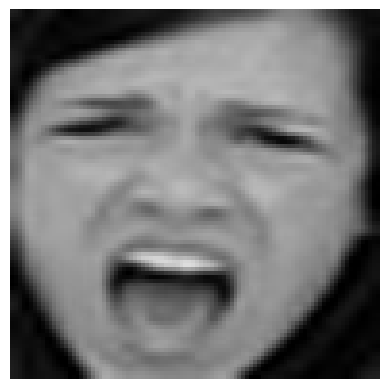

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

training_angry_image_path = get_image_by_index_in_directory(0, 'small_facial_emotions_dataset/train/angry')


plt.axis('off')
plt.imshow(load_img(training_angry_image_path))

---

#### Convert images into tensors

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

small_facial_emotions_path = 'small_facial_emotions_dataset'

train_dataset = image_dataset_from_directory(small_facial_emotions_path + '/train', image_size=(180, 180), batch_size=32, shuffle=True)
validation_dataset = image_dataset_from_directory(small_facial_emotions_path + '/validation', image_size=(180, 180), batch_size=32, shuffle=True)
test_dataset = image_dataset_from_directory(small_facial_emotions_path + '/test', image_size=(180, 180), batch_size=32, shuffle=True)


Found 27440 files belonging to 7 classes.


I0000 00:00:1761931035.466747     523 gpu_process_state.cc:208] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1761931035.467311     523 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5562 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 7000 files belonging to 7 classes.
Found 7000 files belonging to 7 classes.


---

## Section 3: Model definition and hyperparameters



#### Define model architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

inputs = keras.Input(shape=(180, 180, 3))

# Preprocessing block
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

# Convolutional base
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256]:
  residual = x

  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.SeparableConv2D(size, kernel_size=3, padding='same', use_bias=False)(x)

  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.SeparableConv2D(size, kernel_size=3, padding='same', use_bias=False)(x)

  x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

  residual = layers.Conv2D(size, kernel_size=1, strides=2, padding='same', use_bias=False)(residual)
  x = layers.Add()([x, residual])

# Classifier block
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(7, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 180, 180,  │          0 │ input_layer[0][0] │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 180, 180,  │          0 │ sequential[0][0]  │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 176, 176,  │      2,400 │ rescaling[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 176, 176,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 176, 176,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 176, 176,  │      1,312 │ activation[0][0]  │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 176, 176,  │        128 │ separable_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 176, 176,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_1  │ (None, 176, 176,  │      1,312 │ activation_1[0][… │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 88, 88,    │          0 │ separable_conv2d… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 88, 88,    │      1,024 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 88, 88,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 88,    │        128 │ add[0][0]         │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 88, 88,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_2  │ (None, 88, 88,    │      2,336 │ activation_2[0][… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 88,    │        256 │ separable_conv2d

 Total params: 188,871 (737.78 KB)

 Trainable params: 187,399 (732.03 KB)

 Non-trainable params: 1,472 (5.75 KB)

---

#### Compile the model

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-4)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


---

## Section 4: Model training

#### Define callbacks

In [ ]:
callbacks = keras.callbacks.ModelCheckpoint(
    filepath='CNN_facial_emotion_detector.keras',
    save_best_only=True,
    monitor='val_loss'
)


---

#### Train the model

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 89s 101ms/step - accuracy: 0.6249 - loss: 0.9897 - val_accuracy: 0.6070 - val_loss: 1.0276
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - accuracy: 0.6317 - loss: 0.9736 - val_accuracy: 0.6073 - val_loss: 1.0248
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - accuracy: 0.6344 - loss: 0.9587 - val_accuracy: 0.6120 - val_loss: 1.0193
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - accuracy: 0.6347 - loss: 0.9604 - val_accuracy: 0.6114 - val_loss: 1.0189
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - accuracy: 0.6391 - loss: 0.9560 - val_accuracy: 0.6146 - val_loss: 1.0137
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 86s 101ms/step - accuracy: 0.6373 - loss: 0.9561 - val_accuracy: 0.6101 - val_loss: 1.0231
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - accuracy: 0.6402 - loss: 0.9494 - val_accuracy: 0.6147 - val_loss: 1.0126
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - accuracy: 0.6382 -

---

## Section 5: Model results and Inference

In [ ]:
import matplotlib.pyplot as plt

def plot_model_results(training_accuracy, training_loss, val_accuracy, val_loss, epochs):
  plt.clf()

  fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training loss')
  ax[1].plot(epochs, val_loss, label='validation loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.tight_layout()

  plt.show()


<Figure size 640x480 with 0 Axes>

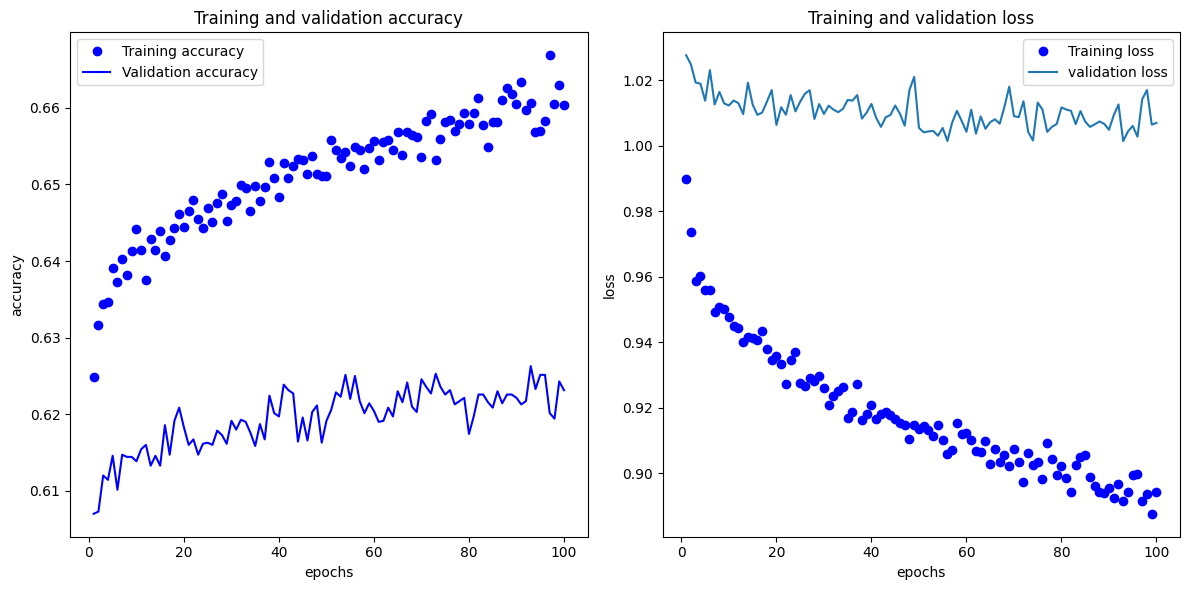

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plot_model_results(accuracy, loss, val_accuracy, val_loss, epochs)


In [ ]:
test_model = keras.models.load_model('CNN_facial_emotion_detector.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')


219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6303 - loss: 0.9887
Test accuracy: 0.630


---